## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

### Semana 4 - Lógica Fuzzy

In [20]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import simpful as sf
from simpful import FuzzySet, FuzzyAggregator
from numpy import prod, mean, max, min

print('Setup completo!')

Setup completo!


#### Aula 01 - Conjuntos Fuzzy

##### Funções de Petinência


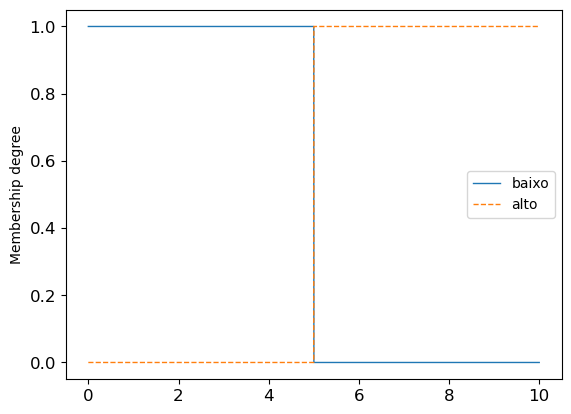

In [4]:
# Logistica booleana, ou está quente ou não está
C1 = sf.CrispSet(a=0, b=5, term='baixo')
C2 = sf.CrispSet(a=5, b=10, term='alto')
sf.LinguisticVariable([C1, C2], universe_of_discourse=[0, 10]).plot()

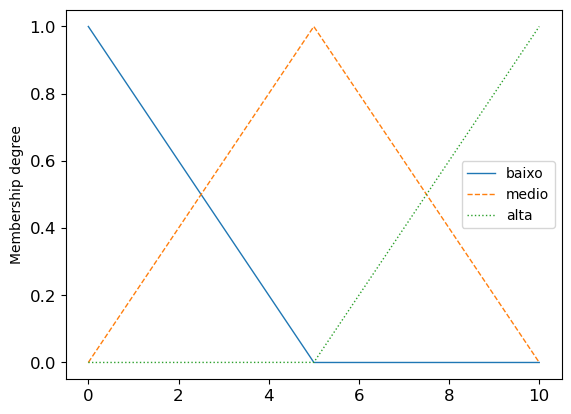

In [5]:
# Triangular
T1 = sf.TriangleFuzzySet(a=0, b=0, c=5, term='baixo')
T2 = sf.TriangleFuzzySet(a=0, b=5, c=10, term='medio')
T3 = sf.TriangleFuzzySet(a=5, b=10, c=10, term='alta')
sf.LinguisticVariable([T1, T2, T3], universe_of_discourse=[0, 10]).plot()

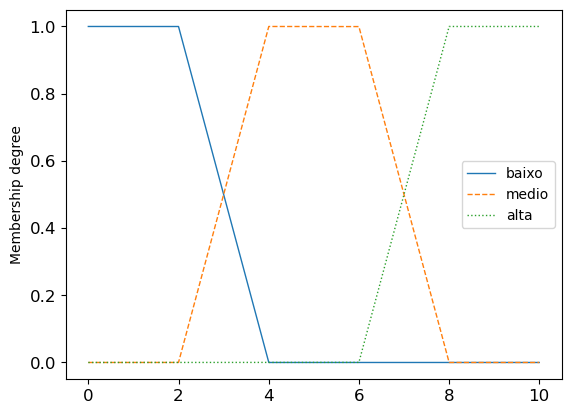

In [6]:
# Triangular
Tra1 = sf.TrapezoidFuzzySet(a=0, b=0, c=2, d=4, term='baixo')
Tra2 = sf.TrapezoidFuzzySet(a=2, b=4, c=6, d=8, term='medio')
Tra3 = sf.TrapezoidFuzzySet(a=6, b=8, c=10, d=10, term='alta')
sf.LinguisticVariable([Tra1, Tra2, Tra3], universe_of_discourse=[0, 10]).plot()

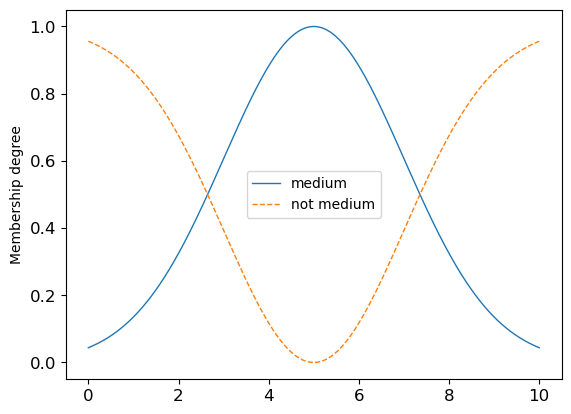

In [10]:
# Gaussiana
G1 = sf.GaussianFuzzySet(mu=5, sigma=2, term='medium')
G2 = sf.InvGaussianFuzzySet(mu=5, sigma=2, term='not medium')
sf.LinguisticVariable([G1, G2], universe_of_discourse=[0, 10]).plot()

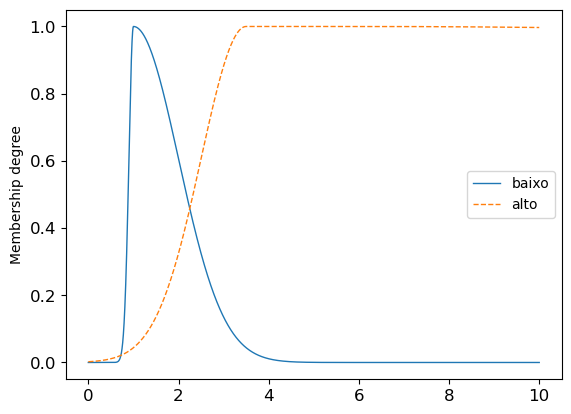

In [11]:
# Double Gaussiana
DG1 = sf.DoubleGaussianFuzzySet(mu1=1, sigma1=0.1, mu2=1, sigma2=1, term='baixo')
DG2 = sf.DoubleGaussianFuzzySet(mu1=3.5, sigma1=1, mu2=6, sigma2=51, term='alto')
sf.LinguisticVariable([DG1, DG2], universe_of_discourse=[0, 10]).plot()

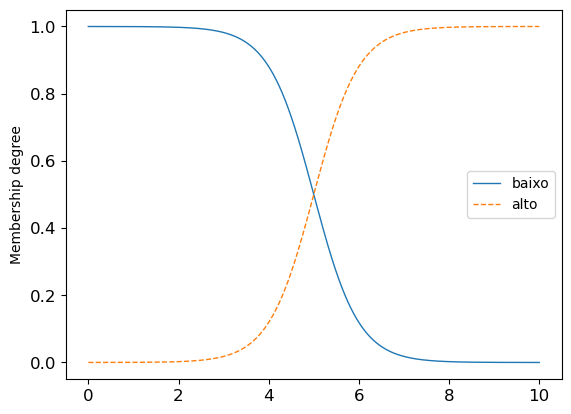

In [13]:
# Sigmoid
S1 = sf.InvSigmoidFuzzySet(c=5, a=2, term='baixo')
S2 = sf.SigmoidFuzzySet(c=5, a=2, term='alto')
sf.LinguisticVariable([S1, S2], universe_of_discourse=[0,10]).plot()

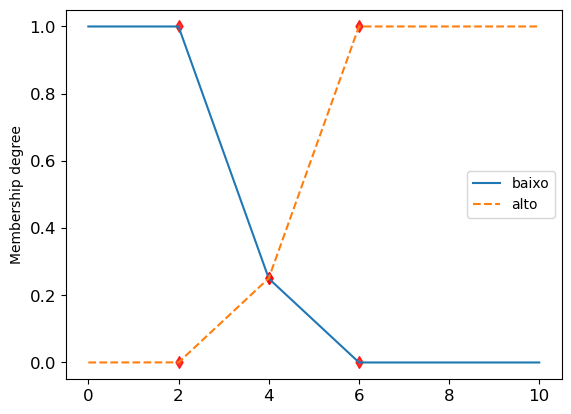

In [14]:
# Polinogo personalizado
P1 = sf.FuzzySet(points=[[2, 1], [4, 0.25], [6, 0]], term='baixo')
P2 = sf.FuzzySet(points=[[2, 0], [4, 0.25], [6, 1]], term='alto')
sf.LinguisticVariable([P1, P2], universe_of_discourse=[0,10]).plot()

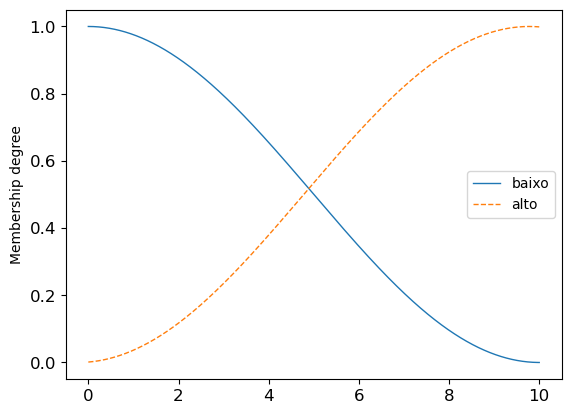

In [19]:
# Personalizada

def fun1(x):
    return 0.5*np.cos(0.314*x)+0.5
def fun2(x):
    return 0.5*np.sin(0.314*x-1.5)+0.5

F1 = sf.FuzzySet(function=fun1, term='baixo')
F2 = sf.FuzzySet(function=fun2, term='alto')
sf.LinguisticVariable([F1, F2], universe_of_discourse=[0,10]).plot()

##### Agregação de Áreas

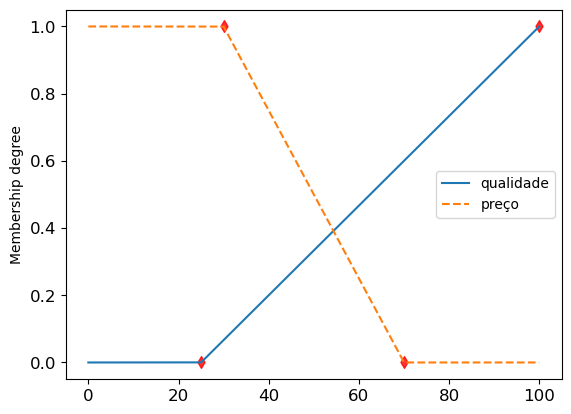

In [24]:
# Objeto agregador fuzzy
A = FuzzyAggregator(verbose=True)

FS1 = FuzzySet(points=[[25, 0], [100, 1]], term='qualidade')
FS2 = FuzzySet(points=[[30, 1], [70, 0]], term='preço')

sf.LinguisticVariable([FS1, FS2], universe_of_discourse=[0,100]).plot()

In [25]:
A.add_variables(FS1, FS2)

A.set_variable('qualidade', 55)
A.set_variable('preço', 42)

resultado = A.aggregate(['qualidade', 'preço'], aggregation_fun='product')
resultado

 * Variable qualidade set to 55.000000
 * Variable preço set to 42.000000
 * Aggregating the following values: [0.4, 0.7]
 * Using aggregation function: product


0.27999999999999997